In [490]:
import pandas as pd
import numpy as np
frame = pd.read_csv('final_data/finalframe.csv',sep=';',index_col=[0])

In [491]:
X = frame.iloc[:,0:len(frame.columns)-1]

In [492]:
y = frame.iloc[:,len(frame.columns)-1]

In [493]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = scaler.get_feature_names_out()

In [494]:
from sklearn.model_selection import train_test_split

In [495]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.3)

In [496]:
from sklearn.linear_model import ElasticNet

In [497]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [498]:
model =ElasticNet(max_iter=100000,alpha=.01)

In [499]:
model = model.fit(X_train,y_train)

In [500]:
model.predict(X_test)

array([ 3.72867844,  3.00423648,  0.89608316,  0.87632939,  0.30966403,
        0.37580695,  0.64688457,  0.75597919,  2.70723854,  1.65696784,
        1.17084401,  0.88551133,  0.7025398 , -0.47502711,  0.84653719,
        1.79664438,  0.71889902,  0.25739765,  2.36958233,  0.82827801,
        0.77709488,  1.57286447,  1.28005549,  0.48969165,  3.64637503,
        0.64758601,  2.28469023])

In [501]:
y_test.to_numpy()

array([3.8277182 , 3.16215214, 0.71077186, 1.88872843, 0.23856367,
       0.31956491, 0.84131742, 1.50290363, 2.37805685, 0.45543704,
       1.63798344, 0.96300019, 0.77169701, 0.0091908 , 1.38572148,
       1.83068405, 0.8624281 , 0.26024736, 1.67867313, 2.00066911,
       0.52103345, 2.16527411, 1.61585319, 0.25942015, 3.31549756,
       0.33032583, 2.47716221])

In [502]:
mae(y_train,model.predict(X_train))

0.06251434754106552

In [503]:
mae(y_test,model.predict(X_test))

0.37000497407250554

In [504]:
mape(y_test,model.predict(X_test))

2.3175089216457234

In [505]:
y_test

2015-03-01    3.827718
2016-02-01    3.162152
2019-06-01    0.710772
2018-06-01    1.888728
2020-07-01    0.238564
2017-07-01    0.319565
2018-10-01    0.841317
2018-08-01    1.502904
2021-08-01    2.378057
2022-07-01    0.455437
2015-08-01    1.637983
2017-03-01    0.963000
2017-10-01    0.771697
2020-04-01    0.009191
2015-09-01    1.385721
2016-05-01    1.830684
2017-01-01    0.862428
2019-09-01    0.260247
2021-06-01    1.678673
2018-07-01    2.000669
2016-11-01    0.521033
2015-07-01    2.165274
2020-02-01    1.615853
2019-01-01    0.259420
2021-10-01    3.315498
2019-07-01    0.330326
2021-02-01    2.477162
Name: target, dtype: float64

In [506]:
coefs = pd.DataFrame(zip(np.array(X_train.columns),model.coef_),columns=['Variable','Coef'])

In [507]:
(coefs[coefs['Coef'] != 0]).sort_values('Coef',ascending=False)

,Variable,Coef
137,FIPE12_FIPE0002Q2_sma3_sma6_sma12_o1,0.134779
96,12577_sma3_sma6,0.132283
353,20122_sma12,0.115394
667,5442_sma3_sma6_o1,0.106115
877,24387_e2_sma3_sma12_o1,0.090940
...,...,...
670,10696_sma6,-0.043301
609,1373_sma6_sma12,-0.043771
448,12570_sma3_sma12,-0.050389
531,21962_e2_sma3_sma12_o1,-0.071849


In [508]:
cof = (coefs[coefs['Coef'] != 0]).sort_values('Coef',ascending=False)

In [509]:
cof['Serie'] = cof['Variable'].str.split('_',expand=True)[0]

In [510]:
bcb_md = pd.read_csv('data/bcb_metadata.csv',encoding='latin-1',sep=';')

In [511]:
cof.merge(bcb_md.astype(str),how='left',left_on='Serie',right_on='Codigo')[['Variable','Nome','Coef']]

,Variable,Nome,Coef
0,FIPE12_FIPE0002Q2_sma3_sma6_sma12_o1,NaN,0.134779
1,12577_sma3_sma6,Empregos formais gerados - Tocantins,0.132283
2,20122_sma12,Índice de volume de vendas no varejo - Outros ...,0.115394
3,5442_sma3_sma6_o1,NFSP sem desvalorização cambial (% PIB) - Flux...,0.106115
4,24387_e2_sma3_sma12_o1,Rendimento médio real habitual das pessoas ocu...,0.090940
...,...,...,...
65,10696_sma6,Dívida mobiliária federal (saldos) - Posição d...,-0.043301
66,1373_sma6_sma12,Produção total de autoveículos,-0.043771
67,12570_sma3_sma12,Empregos formais gerados - Amapá,-0.050389
68,21962_e2_sma3_sma12_o1,Produção Industrial (2012=100)  Geral  Norde...,-0.071849


<AxesSubplot:>

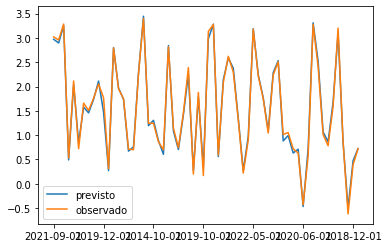

In [512]:
pd.DataFrame({'previsto':model.predict(X_train),'observado':y_train}).plot()

<AxesSubplot:>

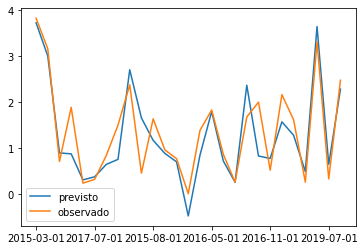

In [513]:
pd.DataFrame({'previsto':model.predict(X_test),'observado':y_test}).plot()

In [488]:
X = X_train.loc[:,model.coef_ > 0]

In [489]:
X_train = X_train.loc[:,model.coef_ > 0]
X_test = X_test.loc[:,model.coef_ > 0]

In [514]:
from sklearn.linear_model import SGDRegressor

In [515]:
m = SGDRegressor(max_iter=100000)

In [516]:
m.fit(X_train,y_train)

SGDRegressor(max_iter=100000)

In [517]:
m.predict(X_test)

array([ 1.04156005e+16,  8.29272190e+15, -2.89951377e+12,  4.79564122e+12,
       -1.35978592e+13,  1.30719483e+12,  4.25909131e+12,  4.11987286e+12,
        5.71806569e+14, -3.07604415e+12,  1.25302035e+16, -2.22346891e+12,
       -5.72209491e+11, -9.20770930e+12,  1.24986414e+16,  6.24098179e+14,
       -4.90668382e+12, -8.39606452e+12,  5.73653353e+14,  4.62718838e+12,
        9.52805470e+12,  1.24972164e+16, -6.77561676e+12,  9.21113659e+12,
        5.77660076e+14, -4.60395634e+12, -2.40114613e+13])

In [518]:
mae(y_test,m.predict(X_test))

2174063727714846.8

In [519]:
from catboost import CatBoostRegressor

In [520]:
m = CatBoostRegressor(iterations=1000,learning_rate=.01,depth=4,l2_leaf_reg=1)

In [521]:
m.fit(X_train,y_train)

0:	learn: 1.0041798	total: 30.3ms	remaining: 30.3s
1:	learn: 0.9976155	total: 42.5ms	remaining: 21.2s
2:	learn: 0.9912162	total: 59.5ms	remaining: 19.8s
3:	learn: 0.9852870	total: 75.3ms	remaining: 18.8s
4:	learn: 0.9786507	total: 86.9ms	remaining: 17.3s
5:	learn: 0.9723735	total: 97.7ms	remaining: 16.2s
6:	learn: 0.9665124	total: 108ms	remaining: 15.4s
7:	learn: 0.9597145	total: 120ms	remaining: 14.9s
8:	learn: 0.9536071	total: 134ms	remaining: 14.7s
9:	learn: 0.9473287	total: 151ms	remaining: 15s
10:	learn: 0.9419100	total: 165ms	remaining: 14.8s
11:	learn: 0.9357815	total: 179ms	remaining: 14.7s
12:	learn: 0.9297432	total: 187ms	remaining: 14.2s
13:	learn: 0.9236046	total: 195ms	remaining: 13.8s
14:	learn: 0.9174937	total: 203ms	remaining: 13.3s
15:	learn: 0.9118009	total: 211ms	remaining: 13s
16:	learn: 0.9066052	total: 218ms	remaining: 12.6s
17:	learn: 0.9005885	total: 227ms	remaining: 12.4s
18:	learn: 0.8946815	total: 239ms	remaining: 12.3s
19:	learn: 0.8888719	total: 256ms	remai

In [522]:
m.predict(X_test)

array([3.19957052, 2.82917013, 1.16218068, 0.75353024, 0.03381227,
       0.27346271, 0.70517037, 0.78457654, 2.6027426 , 1.78415635,
       2.0108539 , 0.78865002, 0.72136419, 0.2605874 , 1.90903023,
       1.93257682, 0.78086624, 0.52020024, 2.37921765, 0.78679278,
       0.77028289, 2.1612228 , 0.90543547, 0.74129442, 3.14172686,
       0.62619673, 2.35201353])

In [523]:
mae(y_test,m.predict(X_test))

0.40655332106218195

In [524]:
mae(y_train,m.predict(X_train))

0.01914593234789528